In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

In [2]:
# 1. initial conditions
C0 = 0.2                    # initial population
M0 = 0.01                   # initial M
X0 = 0.01                   # initial X
y0 = [C0, M0, X0]           # initial condition vector

# other trajectory initial conditions
C02 = 0.1
M02 = 0.4
X02 = 0.01
y02 = [C02, M02, X02]

K_1 = 0.1
K_2 = 0.1
K_3 = 0.1
K_4 = 0.1
V_M1 = 0.5
V_2 = 0.167
V_M3 = 0.2
V_4 = 0.1
v_i = 0.023
v_d = 0.1
K_c = 0.3
K_d = 0.02
k_d = 0.00333


(0.0, 1.0)

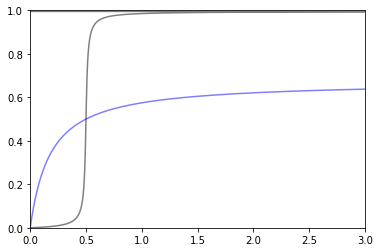

In [5]:
# ignoring divide by zero error
np.seterr(divide='ignore', invalid='ignore')


# 1. parameters

V_M1 = 3
V_2 = 1.5
K_c = 0.5
V_4 = 0.5


# function 'steady_state1' to solve dM/dt = 0

def steady_state1(m1, K_i):
    m = m1
    K = K_i
    
    J = (V_2*m*(K + (1-m))) / ((K + m)*(1-m))
    
    C_m = (J*K_c) / (V_M1 - J)
    return C_m

# concentration intervals

m1_start = 0.0
m1_end = 1.0

m1 = np.linspace(0.0, 1.0, 10000)

# other parameters to plot other curves
k_i1= 0.005
k_i2= 10

result_ss1 = steady_state1(m1, k_i1)
result_ss2 = steady_state1(m1, k_i2)

# get rid of asympotes
utol = 100.
ltol = -100

result_ss2[result_ss2>utol] = np.inf
result_ss2[result_ss2<ltol] = np.inf

# plot results

fig = plt.figure()
plt.plot(result_ss1, m1,  alpha=0.5, color='k')
plt.plot(result_ss2, m1,  alpha=0.5, color='b')

plt.xlim([0, 3])
plt.ylim([0, 1])

(0.0, 1.0)

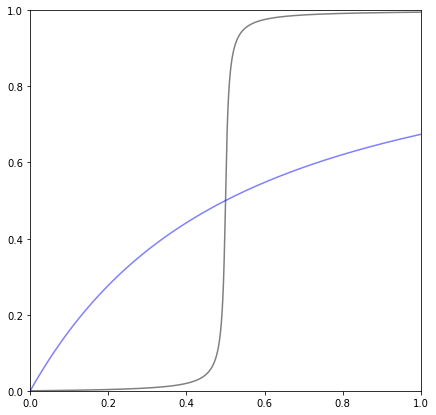

In [7]:
# 1. parameters

V_M1 = 3
V_2 = 1.5
K_c = 0.5
V_4 = 0.5
V_M3 = 1


# fraction intervals
x1 = np.linspace(0.0, 1, 10000)


# function 'steady_state1' to solve dX/dt = 0, function M(X) found
def steady_state2(x1, K_i):
    x = x1
    K = K_i
    
    M_x = (V_4 * x * ( K + (1 - x))) / (V_M3 * (1 - x) * (K + x))
    return M_x

          

# get solutions for different parameters
result2_ss1 = steady_state2(x1, k_i1)
result2_ss2 = steady_state2(x1, k_i2)


# plot results
fig = plt.figure(figsize = (7,7))
plt.plot( result2_ss1, x1,  alpha=0.5, color='k')
plt.plot( result2_ss2, x1, alpha=0.5, color='b')

plt.xlim([0, 1])
plt.ylim([0, 1])